In [1]:
import pandas as pd
# df = pd.read_csv("Data/18_Charge_data.csv", encoding="cp949")     # 과금 데이터 
# df2 = pd.read_csv("Data/18_Customer_data.csv", encoding="cp949")  # 고객 데이터 
# df3 = pd.read_csv("Data/이탈자 데이터.csv")                    # 이탈자 데이터

# 3. 결혼여부 / 부양자수로 이탈률 확인

In [1]:
import pandas as pd
df = pd.read_excel("Data/customer.cleand (2).xlsx")
df

,고객ID,성별,연령,결혼여부,부양자유무,부양자수,추천횟수,영수증발급여부,과금방식,보안서비스,...,고객이탈여부,이탈가능점수,이탈유형,이탈사유,LTV,만족도,데이터사용료,로밍사용료,총로밍요금,과금액
0,C-14721,여성,43,Yes,No,0,1,Yes,신용카드,Yes,...,No,41,NaN,NaN,4743,3,0,28140,2025070,11675100
1,C-15361,여성,33,Yes,Yes,3,1,Yes,계좌이체,Yes,...,No,49,NaN,NaN,5475,4,0,46440,3347170,11641300
2,C-11025,남성,75,Yes,No,0,5,Yes,계좌이체,Yes,...,No,64,NaN,NaN,4404,3,135600,24180,1738620,11628400
3,C-12687,여성,28,Yes,Yes,1,10,Yes,계좌이체,Yes,...,No,54,NaN,NaN,6173,3,0,53110,3825500,11623300
4,C-16549,여성,26,Yes,No,0,4,Yes,계좌이체,Yes,...,No,44,NaN,NaN,4697,3,0,27460,1978630,11603300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6538,C-11173,남성,42,No,No,0,0,Yes,신용카드,No,...,Yes,78,Dissatisfaction,Poor expertise of phone s,5687,2,0,55370,55370,43900
6539,C-13915,남성,35,No,Yes,2,0,No,신용카드,No,...,Yes,80,Attitude,Attitude of service provi,5437,3,0,14460,14460,43600
6540,C-15667,남성,52,No,No,0,0,Yes,신용카드,No,...,Yes,95,Competitor,Product dissatisfaction,3448,1,0,16050,16050,43100
6541,C-14085,남성,52,No,No,0,0,No,이체/메일확인,No,...,Yes,66,Dissatisfaction,Service dissatisfaction,4152,2,0,3500,3500,42700


In [1]:
import pandas as pd
df = pd.read_csv("Data/18_Customer_data.csv", encoding="cp949")
df

,Unnamed: 0,고객ID,성별,연령,결혼여부,부양자유무,부양자수,추천횟수,영수증발급여부,과금방식,...,종료일,고객이탈여부,이탈가능점수,이탈유형,이탈사유,LTV,만족도,데이터사용료,로밍사용료,총로밍요금
0,0,C-10001,여성,37,Yes,No,0,2,Yes,신용카드,...,2022-01-01,No,65,NaN,NaN,2205,3,0,47910,431100
1,1,C-10002,남성,46,No,No,0,0,No,신용카드,...,2022-01-01,No,66,NaN,NaN,5414,5,11300,12090,108710
2,2,C-10003,남성,50,No,No,0,0,Yes,계좌이체,...,2021-02-01,Yes,71,Competitor,Price too high,4479,1,0,38080,152100
3,3,C-10004,남성,78,Yes,No,0,1,Yes,계좌이체,...,2021-07-01,Yes,99,Dissatisfaction,Product dissatisfaction,3714,1,0,31410,408720
4,4,C-10005,여성,75,Yes,No,0,3,Yes,신용카드,...,2021-10-01,Yes,68,Dissatisfaction,Network reliability,3464,1,0,8360,24970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858,6858,C-17039,여성,20,No,No,0,0,No,신용카드,...,2022-01-01,No,59,NaN,NaN,3161,4,0,52770,685680
6859,6859,C-17040,남성,40,Yes,No,0,1,Yes,계좌이체,...,2021-01-01,Yes,68,Dissatisfaction,Product dissatisfaction,5248,1,0,18310,402730
6860,6860,C-17041,남성,22,No,No,0,0,Yes,신용카드,...,2022-01-01,No,33,NaN,NaN,5870,5,0,21020,42040
6861,6861,C-17042,남성,21,No,No,0,5,No,신용카드,...,2022-01-01,No,59,NaN,NaN,4792,3,0,2370,160460


In [2]:
def func(df, marriage, child):
    filtered = df[(df["결혼여부"] == marriage) & (df["부양자유무"] == child)]
    churn_rate = (filtered["고객이탈여부"] == "Yes").mean()
    return churn_rate

conditions = [("Yes", "Yes"), ("Yes", "No"), ("No", "Yes"), ("No", "No")]

for marriage, child in conditions:
    rate = func(df, marriage, child)
    print(f"결혼 {marriage}, 부양자 {child} : 이탈률: {rate:.3%}")

결혼 Yes, 부양자 Yes : 이탈률: 3.908%
결혼 Yes, 부양자 No : 이탈률: 28.795%
결혼 No, 부양자 Yes : 이탈률: 14.286%
결혼 No, 부양자 No : 이탈률: 30.344%


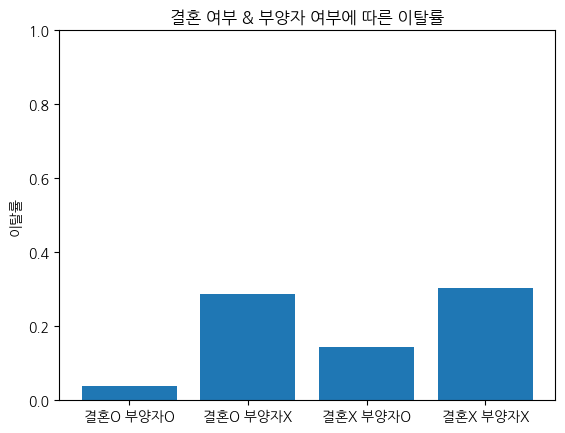

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import warnings
warnings.filterwarnings('ignore')

conditions = [("Yes", "Yes"), ("Yes", "No"), ("No", "Yes"), ("No", "No")]
labels = ["결혼O 부양자O", "결혼O 부양자X", "결혼X 부양자O", "결혼X 부양자X"]
rates = [func(df, marriage, child) for marriage, child in conditions]

plt.bar(labels, rates)

plt.title("결혼 여부 & 부양자 여부에 따른 이탈률")
plt.ylabel("이탈률")
plt.ylim(0, 1)

plt.show()

* 해석

결혼O 부양자X'일 때와 '결혼X 부양자X'일 때 이탈률이 다른 경우에 비해 2배 이상 높게 나타나는 것을 파악하였다.

즉 부양자가 없는 경우에 이탈률이 높게 나타나는 것으로 보이며, 

가족 요금제의 영향이 작용했을 가능성이 존재한다.

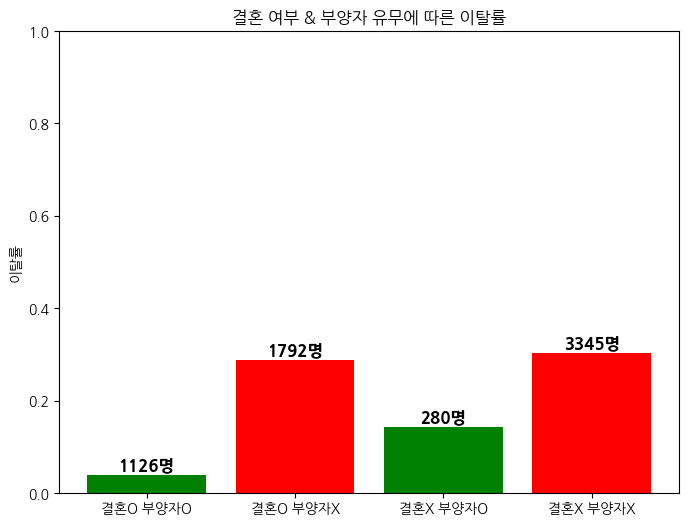

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib
import warnings
warnings.filterwarnings('ignore')

# 조건 정의
conditions = [("Yes", "Yes"), ("Yes", "No"), ("No", "Yes"), ("No", "No")]
labels = ["결혼O 부양자O", "결혼O 부양자X", "결혼X 부양자O", "결혼X 부양자X"]

# 이탈률 및 고객 수 계산
rates = [func(df, marriage, child) for marriage, child in conditions]
counts = [len(df[(df["결혼여부"] == marriage) & (df["부양자유무"] == child)]) for marriage, child in conditions]

# 그래프 그리기
plt.figure(figsize=(8, 6))
bars = plt.bar(labels, rates, color=["green", "red", "green", "red"])

# 막대 위에 고객 수 표시
for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f"{count}명", 
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# 그래프 설정
plt.title("결혼 여부 & 부양자 유무에 따른 이탈률")
plt.ylabel("이탈률")
plt.ylim(0, 1)  # 이탈률이므로 0~1 범위

plt.show()


In [8]:
import pandas as pd

# '고객이탈여부'를 수치형(Yes=1, No=0)으로 변환
df["이탈여부_수치"] = df["고객이탈여부"].map({"Yes": 1, "No": 0})

# '결혼여부'와 '부양자유무'를 수치형으로 변환 (Yes=1, No=0)
df["결혼여부_수치"] = df["결혼여부"].map({"Yes": 1, "No": 0})
df["부양자유무_수치"] = df["부양자유무"].map({"Yes": 1, "No": 0})

# 상관계수 계산
correlation_matrix = df[["결혼여부_수치", "부양자유무_수치", "이탈여부_수치"]].corr()

# 결과 출력
print(correlation_matrix)


           결혼여부_수치  부양자유무_수치   이탈여부_수치
결혼여부_수치   1.000000  0.378570 -0.107885
부양자유무_수치  0.378570  1.000000 -0.208453
이탈여부_수치  -0.107885 -0.208453  1.000000


In [9]:
import pandas as pd
import scipy.stats as stats

# '고객이탈여부'를 수치형(Yes=1, No=0)으로 변환
df["이탈여부_수치"] = df["고객이탈여부"].map({"Yes": 1, "No": 0})

# '결혼여부'와 '부양자유무'를 수치형으로 변환 (Yes=1, No=0)
df["결혼여부_수치"] = df["결혼여부"].map({"Yes": 1, "No": 0})
df["부양자유무_수치"] = df["부양자유무"].map({"Yes": 1, "No": 0})

# 피어슨 상관계수 계산
pearson_corr_marriage, pearson_p_marriage = stats.pearsonr(df["결혼여부_수치"], df["이탈여부_수치"])
pearson_corr_child, pearson_p_child = stats.pearsonr(df["부양자유무_수치"], df["이탈여부_수치"])

# 스피어만 상관계수 계산
spearman_corr_marriage, spearman_p_marriage = stats.spearmanr(df["결혼여부_수치"], df["이탈여부_수치"])
spearman_corr_child, spearman_p_child = stats.spearmanr(df["부양자유무_수치"], df["이탈여부_수치"])

# 결과 출력
print("📌 결혼 여부 & 이탈률")
print(f"   피어슨 상관계수: {pearson_corr_marriage:.4f} (p-value: {pearson_p_marriage:.4f})")
print(f"   스피어만 상관계수: {spearman_corr_marriage:.4f} (p-value: {spearman_p_marriage:.4f})")

print("\n📌 부양자 유무 & 이탈률")
print(f"   피어슨 상관계수: {pearson_corr_child:.4f} (p-value: {pearson_p_child:.4f})")
print(f"   스피어만 상관계수: {spearman_corr_child:.4f} (p-value: {spearman_p_child:.4f})")


📌 결혼 여부 & 이탈률
   피어슨 상관계수: -0.1079 (p-value: 0.0000)
   스피어만 상관계수: -0.1079 (p-value: 0.0000)

📌 부양자 유무 & 이탈률
   피어슨 상관계수: -0.2085 (p-value: 0.0000)
   스피어만 상관계수: -0.2085 (p-value: 0.0000)


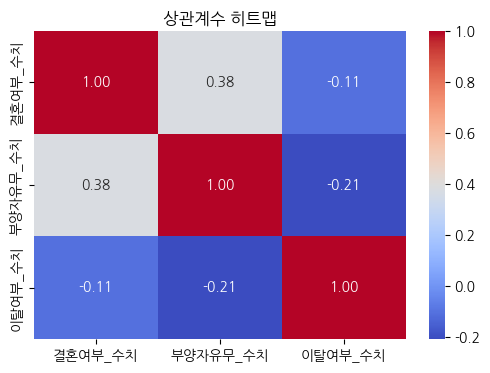

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("상관계수 히트맵")
plt.show()


In [11]:
import pandas as pd
import scipy.stats as stats

# '고객이탈여부'를 수치형(Yes=1, No=0)으로 변환
df["이탈여부_수치"] = df["고객이탈여부"].map({"Yes": 1, "No": 0})

# '결혼여부'와 '부양자유무'를 수치형으로 변환 (Yes=1, No=0)
df["결혼여부_수치"] = df["결혼여부"].map({"Yes": 1, "No": 0})
df["부양자유무_수치"] = df["부양자유무"].map({"Yes": 1, "No": 0})

# 피어슨 상관계수 계산
pearson_corr_marriage, pearson_p_marriage = stats.pearsonr(df["결혼여부_수치"], df["이탈여부_수치"])
pearson_corr_child, pearson_p_child = stats.pearsonr(df["부양자유무_수치"], df["이탈여부_수치"])

# 스피어만 상관계수 계산
spearman_corr_marriage, spearman_p_marriage = stats.spearmanr(df["결혼여부_수치"], df["이탈여부_수치"])
spearman_corr_child, spearman_p_child = stats.spearmanr(df["부양자유무_수치"], df["이탈여부_수치"])

# 결과 출력
print("📌 결혼 여부 & 이탈률")
print(f"   피어슨 상관계수: {pearson_corr_marriage:.4f} (p-value: {pearson_p_marriage:.4f})")
print(f"   스피어만 상관계수: {spearman_corr_marriage:.4f} (p-value: {spearman_p_marriage:.4f})")

print("\n📌 부양자 유무 & 이탈률")
print(f"   피어슨 상관계수: {pearson_corr_child:.4f} (p-value: {pearson_p_child:.4f})")
print(f"   스피어만 상관계수: {spearman_corr_child:.4f} (p-value: {spearman_p_child:.4f})")


📌 결혼 여부 & 이탈률
   피어슨 상관계수: -0.1079 (p-value: 0.0000)
   스피어만 상관계수: -0.1079 (p-value: 0.0000)

📌 부양자 유무 & 이탈률
   피어슨 상관계수: -0.2085 (p-value: 0.0000)
   스피어만 상관계수: -0.2085 (p-value: 0.0000)


In [5]:
import pandas as pd
import scipy.stats as stats

# 부양자 유무별 고객 이탈 여부 교차표
contingency_table_child = pd.crosstab(df["부양자유무"], df["고객이탈여부"])

# 카이제곱 검정 수행
chi2_c, p_c, dof_c, expected_c = stats.chi2_contingency(contingency_table_child)

# 결과 출력
print("부양자 유무와 이탈률 카이제곱 검정 결과:")
print("카이제곱 통계량: ", chi2_c)
print("p-value: ", p_c)
print("자유도: ", dof_c)
print("기대빈도표:\n", expected_c)


부양자 유무와 이탈률 카이제곱 검정 결과:
카이제곱 통계량:  335.88243388930914
p-value:  5.030592076859055e-75
자유도:  1
기대빈도표:
 [[3869.04111264 1267.95888736]
 [1058.95888736  347.04111264]]


In [6]:
# 결혼 여부별 고객 이탈 여부 교차표
contingency_table_marriage = pd.crosstab(df["결혼여부"], df["고객이탈여부"])

# 카이제곱 검정 수행
chi2_m, p_m, dof_m, expected_m = stats.chi2_contingency(contingency_table_marriage)

# 결과 출력
print("결혼 여부와 이탈률 카이제곱 검정 결과:")
print("카이제곱 통계량: ", chi2_m)
print("p-value: ", p_m)
print("자유도: ", dof_m)
print("기대빈도표:\n", expected_m)


결혼 여부와 이탈률 카이제곱 검정 결과:
카이제곱 통계량:  84.90916537991642
p-value:  3.123916967828126e-20
자유도:  1
기대빈도표:
 [[2730.2460645  894.7539355]
 [2197.7539355  720.2460645]]


In [7]:
import pandas as pd
import scipy.stats as stats

# 결혼 여부 & 부양자 유무별 고객 이탈 여부 교차표 생성
contingency_table = pd.crosstab(index=[df["결혼여부"], df["부양자유무"]], columns=df["고객이탈여부"])

# 카이제곱 검정 수행
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# 결과 출력
print("카이제곱 통계량: ", chi2)
print("p-value: ", p)
print("자유도: ", dof)
print("기대빈도표:\n", expected)


카이제곱 통계량:  351.6607335642616
p-value:  6.51739003464684e-76
자유도:  3
기대빈도표:
 [[2519.35809262  825.64190738]
 [ 210.88797188   69.11202812]
 [1349.68302002  442.31697998]
 [ 848.07091548  277.92908452]]
